In [ ]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
from math import factorial

# Actividad 03: Errores

### Profesor: Juan Marcos Marín Ramírez
#### Métodos Computacionales
---

# 1
La serie de Taylor para la función seno ($\sin(x)$) centrada en $a=0$ (también conocida como la serie de Maclaurin) se expresa de la siguiente manera:

> Añadir blockquote



$$\sin(x) = \sum_{n=0}^{\infty} \frac{(-1)^n}{(2n+1)!} x^{2n+1} = x - \frac{x^3}{3!} + \frac{x^5}{5!} - \frac{x^7}{7!} + \cdots$$

* Encontrar la aproximación para $x = \pi/4$ cambiando el valor de tolerancia, ¿Qué puede concluir de la serie?
* Hallar el error relativo y porcentual.
* Grafique los valores asociados a la serie después de cada iteración.
* Repita para la serie:
$$\ln(1+x) = \sum_{n=1}^{\infty} \frac{(-1)^{n-1}}{n} x^n$$

Aproximación de sin(π/4) = 0.707106781186547
Aproximación con tolerancia 1e-10: 0.707106781186568
Error porcentual: 0.0000000000%
Número de términos usados: 7


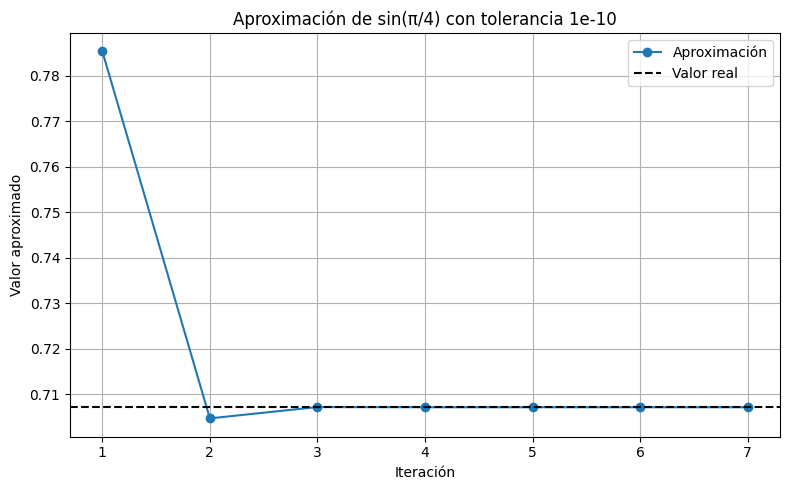

ln(1 + 0.5) = 0.405465108108164
Aproximación con tolerancia 1e-10: 0.405465108129088
Error porcentual: 0.0000000052%
Número de términos usados: 29


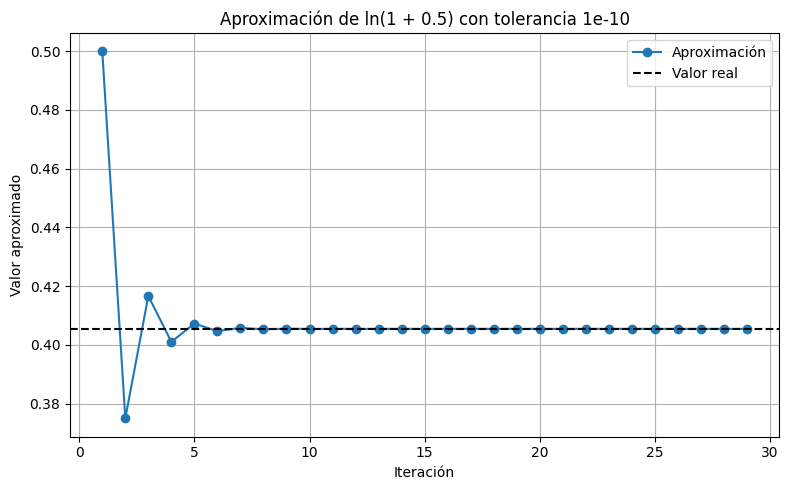

In [10]:
from math import factorial, sin, pi
import matplotlib.pyplot as plt
from math import log


def taylor_sin_con_grafico(x, tol):
    term = x
    approx = term
    n = 1
    valores = [approx]  # Guarda la aproximación tras cada término

    while abs(term) > tol:
        term = (-1)**n * x**(2*n + 1) / factorial(2*n + 1)
        approx += term
        valores.append(approx)
        n += 1

    real = sin(x)
    error_rel = abs((real - approx) / real)
    error_pct = error_rel * 100

    return approx, error_pct, len(valores), valores

# Parámetros
x = pi / 4
tol = 1e-10

# Cálculo
aproximacion, error_pct, terminos, valores = taylor_sin_con_grafico(x, tol)

# Resultados
print(f"Aproximación de sin(π/4) = {sin(x):.15f}")
print(f"Aproximación con tolerancia {tol}: {aproximacion:.15f}")
print(f"Error porcentual: {error_pct:.10f}%")
print(f"Número de términos usados: {terminos}")

# Gráfico
plt.figure(figsize=(8, 5))
plt.plot(range(1, terminos + 1), valores, marker='o', label='Aproximación')
plt.axhline(sin(x), color='black', linestyle='--', label='Valor real')
plt.title('Aproximación de sin(π/4) con tolerancia 1e-10')
plt.xlabel('Iteración')
plt.ylabel('Valor aproximado')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

def taylor_ln1p_con_grafico(x, tol):
    term = x
    approx = term
    n = 2
    valores = [approx]  # Primer término

    while abs(term) > tol:
        term = (-1)**(n - 1) * x**n / n
        approx += term
        valores.append(approx)
        n += 1

    real = log(1 + x)
    error_rel = abs((real - approx) / real)
    error_pct = error_rel * 100

    return approx, error_pct, len(valores), valores

# Parámetros
x = 0.5  # Puedes cambiarlo por otro valor en (-1, 1]
tol = 1e-10

# Cálculo
aproximacion, error_pct, terminos, valores = taylor_ln1p_con_grafico(x, tol)

# Resultados
print(f"ln(1 + {x}) = {log(1 + x):.15f}")
print(f"Aproximación con tolerancia {tol}: {aproximacion:.15f}")
print(f"Error porcentual: {error_pct:.10f}%")
print(f"Número de términos usados: {terminos}")

# Gráfico
plt.figure(figsize=(8, 5))
plt.plot(range(1, terminos + 1), valores, marker='o', label='Aproximación')
plt.axhline(log(1 + x), color='black', linestyle='--', label='Valor real')
plt.title(f'Aproximación de ln(1 + {x}) con tolerancia 1e-10')
plt.xlabel('Iteración')
plt.ylabel('Valor aproximado')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



# 2

La serie de Taylor para la función $(1+x)^\alpha$, conocida como la **serie binomial**, centrada en $a=0$ está dada por:

$$(1+x)^\alpha = \sum_{n=0}^{\infty} \binom{\alpha}{n} x^n = 1 + \alpha x + \frac{\alpha(\alpha-1)}{2!} x^2 + \frac{\alpha(\alpha-1)(\alpha-2)}{3!} x^3 + \cdots$$

donde $\binom{\alpha}{n}$ es el coeficiente binomial generalizado.

Considere el caso donde $\alpha = 1/2$, lo que nos da la serie de Taylor para $\sqrt{1+x}$:

$$\sqrt{1+x} = \sum_{n=0}^{\infty} \binom{1/2}{n} x^n = 1 + \frac{1}{2} x - \frac{1}{8} x^2 + \frac{1}{16} x^3 - \frac{5}{128} x^4 + \cdots$$

a.  **Encontrar la aproximación para $x = 0.5$** cambiando el número de términos incluidos en la suma. ¿Qué puedes concluir sobre la convergencia de la serie para este valor de $x$?

b.  **Hallar el error relativo y porcentual** para cada aproximación, utilizando el valor real de $\sqrt{1+0.5} = \sqrt{1.5} \approx 1.224744871$.


c.  **Grafique los valores asociados a la serie después de cada iteración.** Muestra cómo la serie se acerca al valor real a medida que se incluyen más términos.

d. **Utilizando el criterio de tolerancia, evalue 6 a 7 valores diferentes**, y encuentre cuántos términos son necesarios para alcanzar dicha resolución. Realice un gráfico de la evolución del sistema.



Valor real sqrt(1 + 0.5) = 1.224744871

Términos   Aproximación         Error Relativo       Error %   
1          1.000000000000       0.183503419072       18.350342 
2          1.250000000000       0.020620726160       2.062073  
3          1.218750000000       0.004894791994       0.489479  
4          1.226562500000       0.001484087544       0.148409  
5          1.224121093750       0.000509312312       0.050931  
6          1.224975585938       0.000188377638       0.018838  
7          1.224655151367       0.000073256093       0.007326  


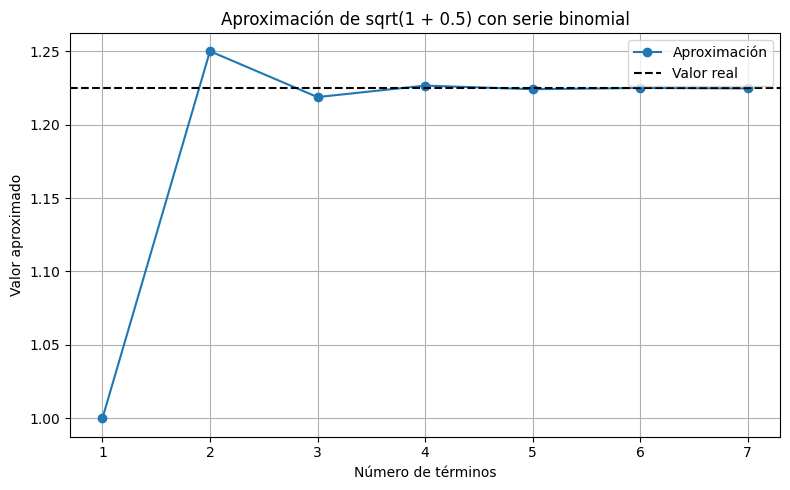


Evaluación con diferentes tolerancias:
Tolerancia: 1e-01, Términos necesarios: 2
Tolerancia: 1e-03, Términos necesarios: 5
Tolerancia: 1e-05, Términos necesarios: 10
Tolerancia: 1e-07, Términos necesarios: 15
Tolerancia: 1e-10, Términos necesarios: 24


In [11]:
from math import comb, sqrt
import matplotlib.pyplot as plt

def coef_binomial_generalizado(alpha, n):
    # Coeficiente binomial generalizado: (alpha choose n)
    resultado = 1
    for k in range(n):
        resultado *= (alpha - k)
    return resultado / factorial(n)

def factorial(n):
    if n == 0 or n == 1:
        return 1
    f = 1
    for i in range(2, n+1):
        f *= i
    return f

def serie_binomial_sqrt(x, num_terminos):
    alpha = 0.5
    suma = 0
    valores = []
    for n in range(num_terminos):
        coef = coef_binomial_generalizado(alpha, n)
        termino = coef * x**n
        suma += termino
        valores.append(suma)
    return suma, valores

def error_relativo(y_real, y_aprox):
    return abs((y_real - y_aprox) / y_real)

x = 0.5
valor_real = sqrt(1 + x)

# a) Aproximación cambiando número de términos
terminos_a_probar = [1, 2, 3, 4, 5, 6, 7]

print(f"Valor real sqrt(1 + {x}) = {valor_real:.9f}\n")
print(f"{'Términos':<10} {'Aproximación':<20} {'Error Relativo':<20} {'Error %':<10}")

for num in terminos_a_probar:
    aprox, valores = serie_binomial_sqrt(x, num)
    err_rel = error_relativo(valor_real, aprox)
    err_pct = err_rel * 100
    print(f"{num:<10} {aprox:<20.12f} {err_rel:<20.12f} {err_pct:<10.6f}")

# c) Graficar la evolución para el máximo número de términos
_, valores_max = serie_binomial_sqrt(x, max(terminos_a_probar))

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(valores_max) + 1), valores_max, marker='o', label='Aproximación')
plt.axhline(valor_real, color='black', linestyle='--', label='Valor real')
plt.title(f'Aproximación de sqrt(1 + {x}) con serie binomial')
plt.xlabel('Número de términos')
plt.ylabel('Valor aproximado')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# d) Evaluar con tolerancia (criterio de error) para varios valores
tolerancias = [1e-1, 1e-3, 1e-5, 1e-7, 1e-10]
print("\nEvaluación con diferentes tolerancias:")

for tol in tolerancias:
    num = 1
    while True:
        aprox, _ = serie_binomial_sqrt(x, num)
        err_rel = error_relativo(valor_real, aprox)
        if err_rel < tol:
            break
        num += 1
    print(f"Tolerancia: {tol:.0e}, Términos necesarios: {num}")
